In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from time import process_time
from scipy.io import loadmat

N = 4

pd = '' #path with data

In [2]:
data = loadmat(pd+'dataAnswer_regular_from_0_to_3pion4.mat')
answers_reg_ = np.transpose(np.array(data['answers']))
data = loadmat(pd+'dataChoi3_sn_regular_from_0_to_3pion4.mat')
chois_reg_ = np.array(data['choi'])

data = loadmat(pd+'dataAnswer_regular_otherY_from_0_to_3pion4.mat')
answers_Y = np.transpose(np.array(data['answers']))
data = loadmat(pd+'dataChoi3_sn_regular_otherY_from_0_to_3pion4.mat')
chois_Y = np.array(data['choi'])

chois_reg = np.concatenate((chois_reg_, chois_Y), axis=0)
answers_reg = np.concatenate((answers_reg_, answers_Y), axis=0)

data = loadmat(pd+'dataAnswer_regular_otherX_from_0_to_3pion4.mat')
answers_other = np.transpose(np.array(data['answers']))
data = loadmat(pd+'dataChoi3_sn_regular_otherX_from_0_to_3pion4.mat')
chois_other = np.array(data['choi'])

data = loadmat(pd+'dataAnswer_regular_otherX_3pion8.mat')
answers_other_2 = np.transpose(np.array(data['answers']))
data = loadmat(pd+'dataChoi3_sn_regular_otherX_3pion8.mat')
chois_other_2 = np.array(data['choi'])

data = loadmat(pd+'dataAnswer_regular_otherY_3pion8.mat')
answers_other3 = np.transpose(np.array(data['answers']))
data = loadmat(pd+'dataAnswer_regular_3pion8.mat')
answers_other4 = np.transpose(np.array(data['answers']))
data = loadmat(pd+'dataChoi3_sn_regular_otherY_3pion8.mat')
chois_other3 = np.array(data['choi'])

#chois_other = np.concatenate((chois_other1, chois_other2), axis=0)
#answers_other = np.concatenate((answers_other1, answers_other2), axis=0)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.linear_model import Ridge

In [4]:
X = chois_reg
y = answers_reg

print([X.shape, y.shape])

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.1, random_state=777)

X_other = chois_other
y_other = answers_other
print([y_train.shape, y_test.shape, np.sum(y)/y.size])

[(60000, 15), (60000, 1)]
[(54000, 1), (6000, 1), 0.6651]


In [5]:
h = .02 
names = [ "Random Forest    "]
classifiers = [ RandomForestClassifier(max_depth=13, n_estimators=100)]

In [6]:
name = names[0]
clf = classifiers[0]
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=13)

In [7]:
score0 = clf.score(X_train, y_train)
score = clf.score(X_test, y_test)
score_other = clf.score(X_other, y_other)
y_t = clf.predict(X_train)
y_p = clf.predict(X_other)
f1_t = metrics.f1_score(y_train, y_t)
f1_p = metrics.f1_score(y_other, y_p)
auc_t = metrics.roc_auc_score(y_train, y_t)
auc_p = metrics.roc_auc_score(y_other, y_p)
print((name+"   {:.3f};   {:.3f};   {:.3f};   {:.3f};   {:.3f};   {:.3f};   {:.3f}").format(score0, score, score_other, f1_t, f1_p, auc_t, auc_p))

Random Forest       0.998;   0.990;   0.328;   0.999;   0.494;   0.998;   0.500


In [8]:
print([(y_t.reshape(y_t.size)!=y_train.reshape(y_t.size)).shape, X_train.shape])
x_train_false = X_train[np.transpose(np.tile(y_t.reshape(y_t.size)!=y_train.reshape(y_t.size), (X_train.shape[1], 1)))].reshape(-1,15)
x_train_true = X_train[np.transpose(np.tile(y_t.reshape(y_t.size)==y_train.reshape(y_t.size), (X_train.shape[1], 1)))].reshape(-1,15)
x_proba_false = clf.predict_proba(x_train_false)
x_proba_true = clf.predict_proba(x_train_true)

[(54000,), (54000, 15)]


In [9]:
print([(y_p.reshape(y_p.size)!=y_other.reshape(y_p.size)).shape, X_other.shape])
x_other_false = X_other[np.transpose(np.tile(y_p.reshape(y_p.size)!=y_other.reshape(y_p.size), (X_other.shape[1], 1)))].reshape(-1,15)
x_other_true = X_other[np.transpose(np.tile(y_p.reshape(y_p.size)==y_other.reshape(y_p.size), (X_other.shape[1], 1)))].reshape(-1,15)
x_other_proba_false = clf.predict_proba(x_other_false)
x_other_proba_true = clf.predict_proba(x_other_true)

[(30000,), (30000, 15)]


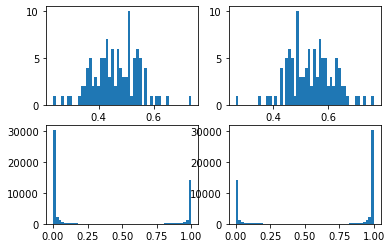

In [10]:
import matplotlib.pyplot as plt
plt.subplot(2, 2, 1)
n, bins, patches = plt.hist(x_proba_false[:,0], 50)
plt.subplot(2, 2, 2)
n, bins, patches = plt.hist(x_proba_false[:,1], 50)
plt.subplot(2, 2, 3)
n, bins, patches = plt.hist(x_proba_true[:,0], 50)
plt.subplot(2, 2, 4)
n, bins, patches = plt.hist(x_proba_true[:,1], 50)
plt.show()

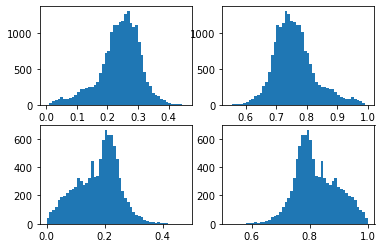

In [11]:
plt.subplot(2, 2, 1)
n, bins, patches = plt.hist(x_other_proba_false[:,0], 50)
plt.subplot(2, 2, 2)
n, bins, patches = plt.hist(x_other_proba_false[:,1], 50)
plt.subplot(2, 2, 3)
n, bins, patches = plt.hist(x_other_proba_true[:,0], 50)
plt.subplot(2, 2, 4)
n, bins, patches = plt.hist(x_other_proba_true[:,1], 50)
plt.show()

In [12]:
print([chois_reg.shape, answers_reg.shape])

clf_proba = clf.predict_proba(chois_reg)[:, 0]
clf_proba = np.logical_and(clf_proba > 0.1, clf_proba < 0.9)
chois_reg_cor = chois_reg[np.transpose(clf_proba == 1), :]
answers_reg_cor = answers_reg[clf_proba == 1, :]


print([chois_reg_cor.shape, answers_reg_cor.shape])

clf_proba = clf.predict_proba(chois_other)[:, 0]
clf_proba = np.logical_and(clf_proba > 0.1, clf_proba < 0.9)
chois_other_cor = chois_other[clf_proba == 1, :]
answers_other_cor = answers_other[clf_proba == 1, :]


X_cor = chois_other_cor 
y_cor = answers_other_cor 

print([X_cor.shape, y_cor.shape])

X_cor_train, X_cor_test, y_cor_train, y_cor_test = \
    train_test_split(X_cor, y_cor, test_size=.2, random_state=777)

X_cor_other = chois_other_2
y_cor_other = answers_other_2
print([y_cor_train.shape, y_cor_test.shape, np.sum(y_cor)/y_cor.size])
print([X_cor_other.shape, np.sum(y_cor_other)/y_cor_other.size])

[(60000, 15), (60000, 1)]
[(3164, 15), (3164, 1)]
[(27437, 15), (27437, 1)]
[(21949, 1), (5488, 1), 0.29693479607828843]
[(5000, 15), 0.3844]


In [13]:
names_cor = [
    "Nearest Neighbors", 
    "Linear SVM       ",
    "Poly SVM         ",
    "sigmoid SVM      ",
    "RBF SVM          ", 
    "Decision Tree    ",
    "Random Forest    ",
    "Neural Net       ",
    "AdaBoost         ",
    "Naive Bayes      ",
    "LDA              ",
    "QDA              "
    ]

classifiers_cor = [ 
    KNeighborsClassifier(3),
    SVC(kernel="linear"),
    SVC(kernel="poly", degree=23),
    SVC(kernel="sigmoid"),
    SVC(),
    DecisionTreeClassifier(max_depth=13),
    RandomForestClassifier(max_depth=13, n_estimators=100),
    MLPClassifier(alpha=0.01,hidden_layer_sizes=[128, 32, 8, 8]),
    AdaBoostClassifier(DecisionTreeClassifier(max_depth=9), n_estimators=250),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis() 
    ]

In [14]:
print("Name   Method       Train,%;    Test,%;   Other,%;  F1_train;  F1_other; AUC_train; AUC_other") 

for name_cor, clf_cor in zip(names_cor, classifiers_cor):
    clf_cor.fit(X_cor_train, y_cor_train)
    score0 = clf_cor.score(X_cor_train, y_cor_train)
    score = clf_cor.score(X_cor_test, y_cor_test)
    score_other = clf_cor.score(X_cor_other, y_cor_other)
    y_t = clf_cor.predict(X_cor_train)
    y_p = clf_cor.predict(X_cor_other)
    
    
    f1_t = metrics.f1_score(y_cor_train, y_t)
    f1_p = metrics.f1_score(y_cor_other, y_p)
    auc_t = metrics.roc_auc_score(y_cor_train, y_t)
    auc_p = metrics.roc_auc_score(y_cor_other, y_p)
    
    print((name_cor+"   {:.5f};   {:.5f};   {:.5f};   {:.5f};   {:.5f};   {:.5f};   {:.5f}").format(score0, score, score_other, f1_t, f1_p, auc_t, auc_p))


Name   Method       Train,%;    Test,%;   Other,%;  F1_train;  F1_other; AUC_train; AUC_other
Nearest Neighbors   0.98989;   0.97285;   0.93860;   0.98305;   0.92020;   0.98822;   0.93528
Linear SVM          0.83120;   0.83837;   0.82220;   0.66834;   0.73263;   0.75626;   0.78681
Poly SVM            0.87949;   0.88776;   0.88560;   0.79188;   0.85073;   0.84782;   0.87855
sigmoid SVM         0.74026;   0.74052;   0.68560;   0.30788;   0.34336;   0.58302;   0.59701
RBF SVM             0.80906;   0.81469;   0.77180;   0.60127;   0.62356;   0.71527;   0.71920
Decision Tree       0.99558;   0.96538;   0.91580;   0.99260;   0.88924;   0.99540;   0.90894
Random Forest       0.99795;   0.97850;   0.95560;   0.99656;   0.94261;   0.99766;   0.95427
Neural Net          0.93280;   0.92985;   0.92380;   0.88845;   0.89982;   0.92283;   0.91749
AdaBoost            1.00000;   0.98178;   0.95980;   1.00000;   0.94742;   1.00000;   0.95650
Naive Bayes         0.78186;   0.79282;   0.71900;   0.53196

In [15]:
clf_cor = RandomForestClassifier(max_depth=13, n_estimators=100)
clf_cor.fit(X_cor_train, y_cor_train)

score0 = clf_cor.score(X_cor_train, y_cor_train)
score = clf_cor.score(X_cor_test, y_cor_test)
score_other = clf_cor.score(X_cor_other, y_cor_other)
y_t = clf_cor.predict(X_cor_train)
y_p_without = clf.predict(X_cor_other)
y_p = clf_cor.predict(X_cor_other)
f1_t = metrics.f1_score(y_cor_train, y_t)
f1_p = metrics.f1_score(y_cor_other, y_p)
auc_t = metrics.roc_auc_score(y_cor_train, y_t)
auc_p = metrics.roc_auc_score(y_cor_other, y_p)
print((name+"   {:.3f};   {:.3f};   {:.3f};   {:.3f};   {:.3f};   {:.3f};   {:.3f}").format(score0, score, score_other, f1_t, f1_p, auc_t, auc_p))

Random Forest       0.998;   0.978;   0.954;   0.996;   0.940;   0.997;   0.952


870


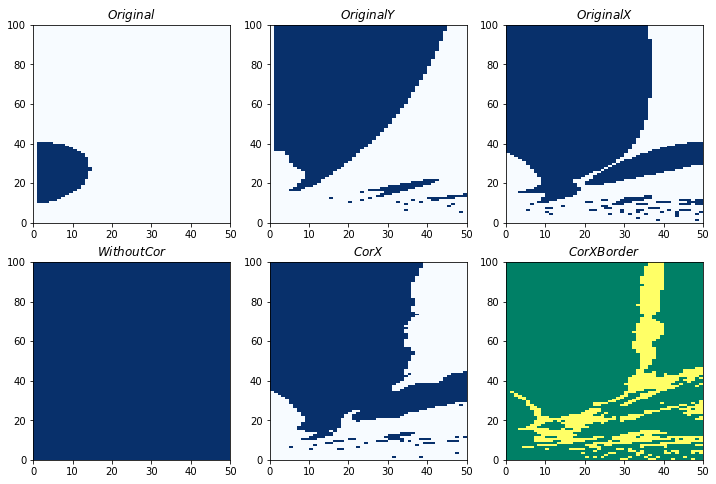

In [16]:
plt.rcParams['figure.figsize'] = (12, 8)
N1 = 0
N2 = 5000
N3 = 0

ax = plt.subplot(231)
c = ax.pcolormesh(np.transpose(np.reshape(answers_other4[N1:N1+5000], (50,100))), cmap='Blues_r')
ax.set_title(r'$Original$')

ax = plt.subplot(232)
c = ax.pcolormesh(np.transpose(np.reshape(answers_other3[N1:N1+5000], (50,100))), cmap='Blues_r')
ax.set_title(r'$Original Y$')

ax = plt.subplot(233)
c = ax.pcolormesh(np.transpose(np.reshape(answers_other_2[N3:N3+5000], (50,100))), cmap='Blues_r')
ax.set_title(r'$Original X$')

ax = plt.subplot(234)
c = ax.pcolormesh(np.transpose(np.reshape(y_p_without, (50,100))), cmap='Blues_r')
ax.set_title(r'$Without Cor$')

ax = plt.subplot(235)
c = ax.pcolormesh(np.transpose(np.reshape(y_p, (50,100))), cmap='Blues_r')
ax.set_title(r'$Cor X$')


answer_rf_other = clf_cor.predict(chois_other_2)
clf_proba_other = clf_cor.predict_proba(chois_other_2)[:, 0]
clf_proba_other = np.logical_and(clf_proba_other > 0.2, clf_proba_other < 0.8)

ax = plt.subplot(236)
c = ax.pcolormesh(np.transpose(np.reshape(clf_proba_other[N3:N3+5000], (50,100))), cmap='summer')
ax.set_title(r'$Cor X Border$')
print(np.sum(clf_proba_other[N3:N3+5000]))

In [17]:
x = chois_reg
y = answers_reg
y_t = clf.predict(x)
score = metrics.accuracy_score(y, y_t)
f1_t = metrics.f1_score(y, y_t)
auc_t = metrics.roc_auc_score(y, y_t)
print(("WithoutCorTwo   {:.3f};   {:.3f};   {:.3f};").format(score, f1_t, auc_t))

x = chois_other
y = answers_other
y_t = clf.predict(x)
score = metrics.accuracy_score(y, y_t)
f1_t = metrics.f1_score(y, y_t)
auc_t = metrics.roc_auc_score(y, y_t)
print(("WithoutCor3rd   {:.3f};   {:.3f};   {:.3f};").format(score, f1_t, auc_t))

x = chois_other_2
y = answers_other_2
y_t = clf.predict(x)
score = metrics.accuracy_score(y, y_t)
f1_t = metrics.f1_score(y, y_t)
auc_t = metrics.roc_auc_score(y, y_t)
print(("WithoutCorOther   {:.3f};   {:.3f};   {:.3f};").format(score, f1_t, auc_t))

WithoutCorTwo   0.997;   0.998;   0.997;
WithoutCor3rd   0.328;   0.494;   0.500;
WithoutCorOther   0.384;   0.555;   0.500;


In [18]:
x = chois_reg
y = answers_reg

y_t = clf.predict(x)
y_t_cor = clf_cor.predict(x)
clf_proba = clf.predict_proba(x)[:, 0]
clf_proba = np.logical_and(clf_proba > 0.1, clf_proba < 0.9)
y_t=np.array(y_t)
y_t[np.transpose(clf_proba == 1)] = y_t_cor[np.transpose(clf_proba == 1)]

score = metrics.accuracy_score(y, y_t)
f1_t = metrics.f1_score(y, y_t)
auc_t = metrics.roc_auc_score(y, y_t)
print(("WithCorTwo   {:.3f};   {:.3f};   {:.3f};").format(score, f1_t, auc_t))

x = chois_other
y = answers_other
y_t = clf.predict(x)
y_t_cor = clf_cor.predict(x)
clf_proba = clf.predict_proba(x)[:, 0]
clf_proba = np.logical_and(clf_proba > 0.1, clf_proba < 0.9)
y_t=np.array(y_t)
y_t[np.transpose(clf_proba == 1)] = y_t_cor[np.transpose(clf_proba == 1)]
score = metrics.accuracy_score(y, y_t)
f1_t = metrics.f1_score(y, y_t)
auc_t = metrics.roc_auc_score(y, y_t)
print(("WithCor3rd   {:.3f};   {:.3f};   {:.3f};").format(score, f1_t, auc_t))

x = chois_other_2
y = answers_other_2
y_t = clf.predict(x)
y_t_cor = clf_cor.predict(x)
clf_proba = clf.predict_proba(x)[:, 0]
clf_proba = np.logical_and(clf_proba > 0.1, clf_proba < 0.9)
y_t=np.array(y_t)
y_t[np.transpose(clf_proba == 1)] = y_t_cor[np.transpose(clf_proba == 1)]
score = metrics.accuracy_score(y, y_t)
f1_t = metrics.f1_score(y, y_t)
auc_t = metrics.roc_auc_score(y, y_t)
print(("WithCorOther   {:.3f};   {:.3f};   {:.3f};").format(score, f1_t, auc_t))

WithCorTwo   0.972;   0.979;   0.959;
WithCor3rd   0.965;   0.949;   0.972;
WithCorOther   0.937;   0.921;   0.941;


In [19]:
clf_n = clf

X_n_train, X_n_test, y_n_train, y_n_test = \
    train_test_split(np.concatenate((chois_reg, chois_other), axis=0), 
                     np.concatenate((answers_reg, answers_other), axis=0), test_size=.1, random_state=777)
clf_n.fit(X_n_train, y_n_train)

x = chois_reg
y = answers_reg

y_t = clf_n.predict(x)
score = metrics.accuracy_score(y, y_t)
f1_t = metrics.f1_score(y, y_t)
auc_t = metrics.roc_auc_score(y, y_t)
print(("Two   {:.3f};   {:.3f};   {:.3f};").format(score, f1_t, auc_t))

x = chois_other
y = answers_other
y_t = clf_n.predict(x)
score = metrics.accuracy_score(y, y_t)
f1_t = metrics.f1_score(y, y_t)
auc_t = metrics.roc_auc_score(y, y_t)
print(("3rd   {:.3f};   {:.3f};   {:.3f};").format(score, f1_t, auc_t))

x = chois_other_2
y = answers_other_2
y_t = clf_n.predict(x)
score = metrics.accuracy_score(y, y_t)
f1_t = metrics.f1_score(y, y_t)
auc_t = metrics.roc_auc_score(y, y_t)
print(("Other   {:.3f};   {:.3f};   {:.3f};").format(score, f1_t, auc_t))

Two   0.993;   0.994;   0.990;
3rd   0.990;   0.985;   0.991;
Other   0.954;   0.941;   0.953;
